In [ ]:
# import libraries
import tensorflow as tf
import keras
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [ ]:
# !unzip /content/Dataset.zip -d /content/extracted

In [ ]:
# buat nampung dimensions dari setiap gambar
img_rows, img_cols = 224, 224

# buat nampung path kta
data_path = "/content/extracted/"

# buat nampung label
x, y = [], []

# sebagai label kita 0, 1, 2,.... , semisal 0 buat tomato, 1 buat cucumber etc
counter = 0

# ambil smua data name folder dari directory kita
classes = os.listdir(data_path)

# stiap classes yang ada di data path, dan stiap images yang ada disana, labelnya
# kita kasih sesuai counter
# dan kita proses menggunakan tensorflow (dari img to array)
for class_path in os.listdir(data_path):
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        label = counter
        # convert jadi grayscale
        image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols), color_mode='grayscale')
        image = tf.keras.preprocessing.image.img_to_array(image)
        x.append(image)
        y.append(label)
    counter += 1

x = np.array(x)
y = np.array(y)

In [ ]:
# dijadikan float supaya process model kita calculationnya lebih bagus
# also bagi 255 supaya [0, 255] to [0, 1] (normalisasi).
x = x.astype('float32') / 255.0

# 80 : 10 : 10
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=420)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=420)

# ubah jd one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_val = keras.utils.to_categorical(y_val, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)

print(X_train.shape)

(1600, 224, 224, 1)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(img_rows, img_cols, 1)))
# sesuaiin input shape dengan X_train.shape
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Conv2D(6, (5,5), activation='relu'))
model.add(keras.layers.Conv2D(6, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 220, 220, 6)    │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 6)    │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 102, 102, 6)    │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 51, 51, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 15606)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │     1,872,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           484 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,875,292 (7.15 MB)

 Trainable params: 1,875,292 (7.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=120, validation_data=(X_val, y_val), epochs=10)

score = model.evaluate(X_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.2427 - loss: 1.8026 - val_accuracy: 0.2450 - val_loss: 1.3648
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.2772 - loss: 1.3625 - val_accuracy: 0.4500 - val_loss: 1.3133
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4693 - loss: 1.2807 - val_accuracy: 0.5200 - val_loss: 1.1163
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6006 - loss: 1.0184 - val_accuracy: 0.6900 - val_loss: 0.8240
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7121 - loss: 0.7495 - val_accuracy: 0.7750 - val_loss: 0.6623
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7731 - loss: 0.5795 - val_accuracy: 0.7850 - val_loss: 0.5647
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8485 - loss: 0.4283 - val_accuracy: 0.8150 - val_loss: 0.5018
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8399 - loss: 0.4180 - val_accuracy: 0.8300 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


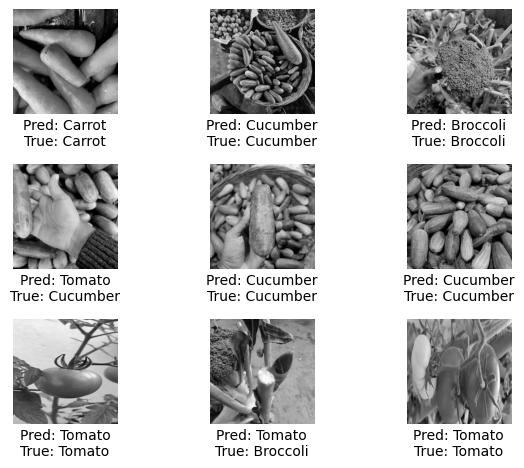

In [ ]:
predictions = model.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
predict_labels = np.argmax(predictions, axis = 1)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.text(0.5, -0.15, f"Pred: {classes[predict_labels[i]]}", fontsize=10, ha='center', transform=plt.gca().transAxes)
    plt.text(0.5, -0.3, f"True: {classes[true_labels[i]]}", fontsize=10, ha='center', transform=plt.gca().transAxes)
plt.tight_layout() # biar text yg true gk ketutup foto dibawahnya
plt.show()

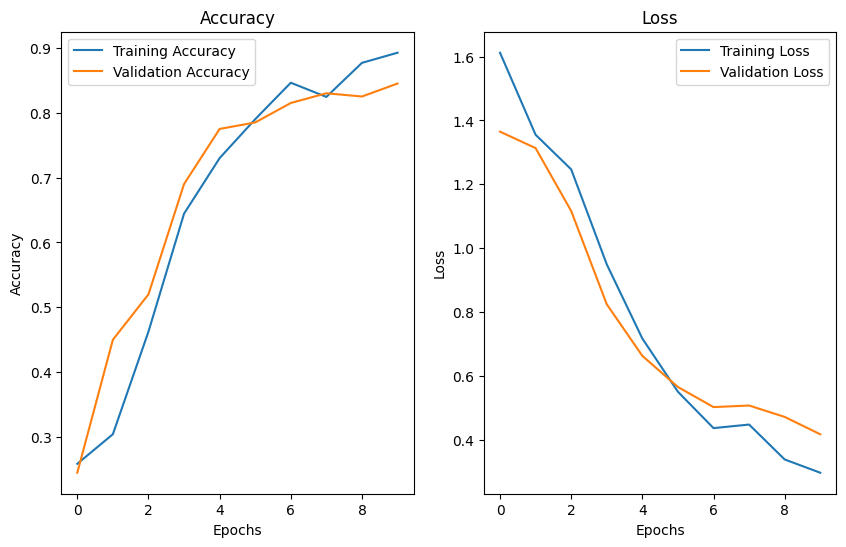

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()